51


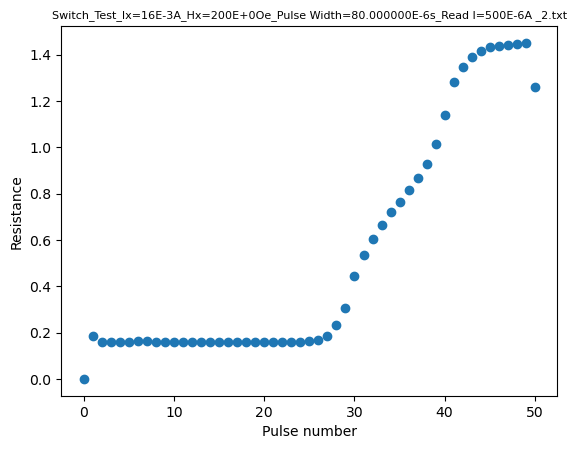

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_name = 'Switch_Test_Ix=16E-3A_Hx=200E+0Oe_Pulse Width=80.000000E-6s_Read I=500E-6A _2.txt'
data = np.loadtxt(file_name, skiprows=1)

pulse_num = data[:, 0]
resistance = data[:, 1]
pulse_amp = data[:, 2]
print(len(pulse_num))

plt.figure()
plt.plot(pulse_num, resistance, 'o')
plt.title(file_name, fontsize=8)
plt.xlabel('Pulse number')
plt.ylabel('Resistance')
plt.show()

In [2]:
def open_switch_test(file_path='', plot=False):
    data = np.loadtxt(file_path, skiprows=1)

    pulse_num = data[:, 0]
    resistance = data[:, 1]
    pulse_amp = data[:, 2]

    if plot:
        plt.figure()
        plt.plot(pulse_num, resistance, '-o')
        plt.ylim((1.44, 1.52))
        plt.title(file_name, fontsize=8)
        plt.xlabel('Pulse number')
        plt.ylabel('Resistance')
        plt.show()
    
    return pulse_num, resistance, pulse_amp

250


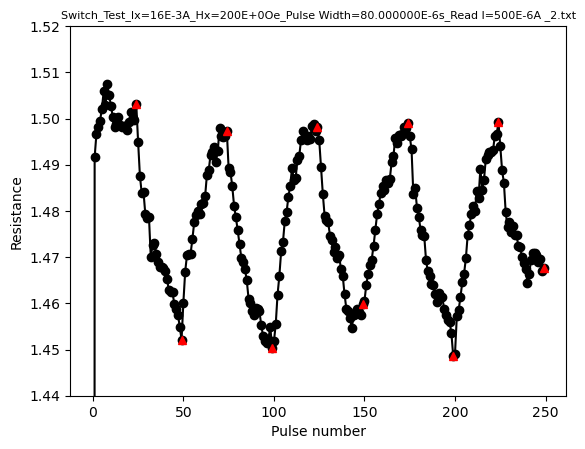

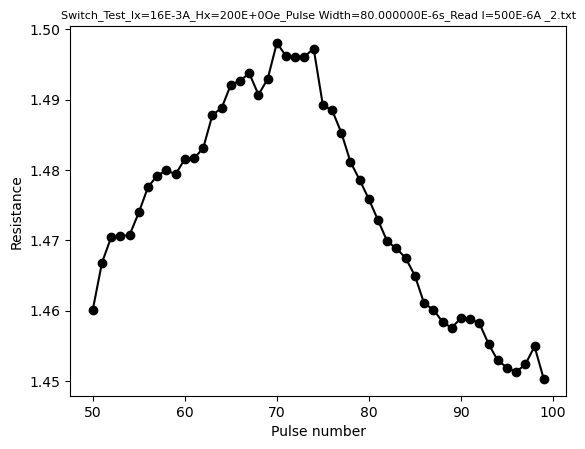

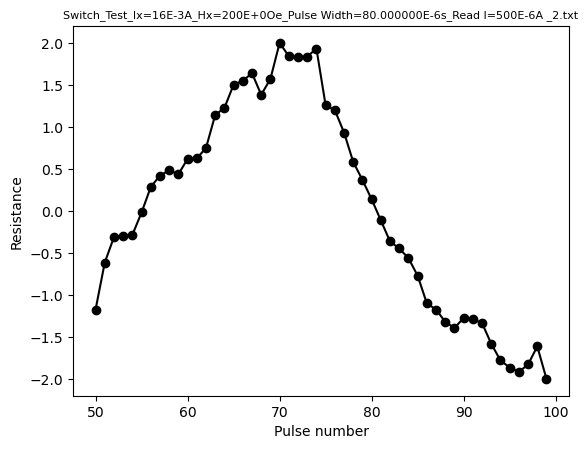

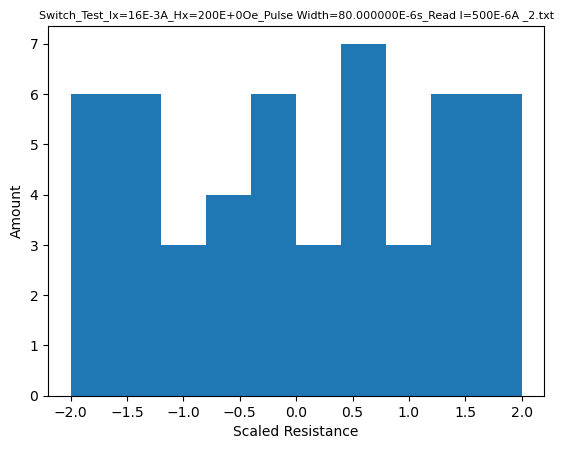

In [4]:
def scale_array(arr, min_val, max_val):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    scaled_arr = (arr - arr_min) / (arr_max - arr_min)  # 將數組縮放到[0, 1]範圍
    scaled_arr = scaled_arr * (max_val - min_val) + min_val  # 將數組縮放到指定範圍
    return scaled_arr

def min_scale(arr):
    arr_min = np.min(arr)
    return arr - arr_min

def mean_scale(arr):
    arr_mean = (np.max(arr)+np.min(arr)) / 2
    return arr - arr_mean


pn, r, _ = open_switch_test('Switch_Test_Ix=16E-3A_Hx=0E+0Oe_Pulse Width=80.000000E-6s_Read I=500E-6A _5.txt', plot=False)
print(len(pn))

# origin
turning_point = [(i+1)*25-1 for i in range(10)]
turning_r = r[turning_point]
plt.figure()
plt.plot(pn, r, '-ko')
plt.plot(turning_point, turning_r, 'r^')
plt.ylim((1.44, 1.52))
plt.title(file_name, fontsize=8)
plt.xlabel('Pulse number')
plt.ylabel('Resistance')
plt.show()

# cut
r_period = r[50:100]
plt.figure()
plt.plot(pn[50:100], r_period, '-ko')
# plt.ylim((1.44, 1.52))
plt.title(file_name, fontsize=8)
plt.xlabel('Pulse number')
plt.ylabel('Resistance')
plt.show()

##### 調整縮放範圍 #####
r_period_scale = scale_array(np.array(r_period), -2, 2)
# r_period_scale = mean_scale(np.array(r_period))
#######################

# cut & scaled
plt.figure()
plt.plot(pn[50:100], r_period_scale, '-ko')
# plt.ylim((-2.5, 2.5))
plt.title(file_name, fontsize=8)
plt.xlabel('Pulse number')
plt.ylabel('Resistance')
plt.show()

# cut & scaled & sort
plt.figure()
plt.hist(r_period_scale)
plt.title(file_name, fontsize=8)
plt.xlabel('Scaled Resistance')
plt.ylabel('Amount')
plt.show()

# save file
np.save('Synapse_weight/weight1_1period', r_period_scale)

250


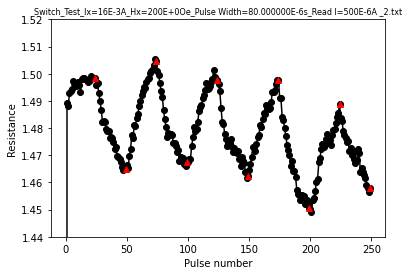

In [4]:
pn, r, _ = open_switch_test('Switch_Test_Ix=16E-3A_Hx=0E+0Oe_Pulse Width=80.000000E-6s_Read I=500E-6A _7.txt', plot=False)
print(len(pn))

turning_point = [(i+1)*25-1 for i in range(10)]
turning_r = r[turning_point]
plt.figure()
plt.plot(pn, r, '-ko')
plt.plot(turning_point, turning_r, 'r^')
plt.ylim((1.44, 1.52))
plt.title(file_name, fontsize=8)
plt.xlabel('Pulse number')
plt.ylabel('Resistance')
plt.show()

In [18]:
# test weights
test_w = np.linspace(-2, 2, 160)
# print(test_w)
np.save('Synapse_weight/test_weight_160', test_w)